# CH.4.4 선형판별분석(Linear Discriminant Analysis)

## **수업목표**
1.
### Confusion Matrix , ROC(receiver operating characteristic) curve 이해
2.
### LDA, QDA, (+Baysian Classifier) 에 대한 이해와 실습
---

# 혼동행렬(Confusion Matrix)

**Confusion Matrix는 정확도(accuracy), 정밀도(precision), 재현율(recall) 등을 측정할 수 있는 테이블**

T : Truth 참
F : False 허위, 거짓
P : Positive 양성
N : Negative 음성

TP(True Positive): True를 True로 잘 예측한 것

TN(True Negative): False를 False로 잘 예측한 것

FP(False Positive): False를 True로 잘 못 예측한 것

FN(False Negative): True를 False로 잘 못 예측한 것

---

정확도=True를 True로, Flase를 False로 잘 예측했는가?
$$accuracy=\frac{TP+TN}{TP+TN+FP+FN}$$

* 100,000개 데이터 중 99,900개 정상거래, 100개 사기 거래인 경우 = 정확도 : 99.9% 

but, 우리가 관심이 있는 부분은 100개의 사기 거래에 대한 예측. 이 경우 정확도는 적절한 평가지표가 아님

---

정밀도= True로 예측한 값들 중에서 정말로 예측한 값이 맞는가?
$$precision=\frac{TP}{TP+FP}$$
* 정밀도가 상대적으로 더 중요한 지표인 경우 실제 False인 데이터 예측을 Positive로 잘못 판단(허위 음성)하게 되면 큰 불이익이 발생하는 경우
* 정밀도와 재현율은 서로 상충관계인 경우가 많음
* 예를 들어, 임계값을 높게 설정하면 정밀도는 증가하지만 재현율은 감소함
---

특이도 : 음성 중 실제로 음성이라고 예측한 비율
$$fallout=\frac{TN}{FP+TN}$$

* 1-FPR = type 1 error

---

민감도,재현율 = 잘 예측한 클래스 중 실제로 참인데 positive로 예측한 비율
$$recall=\frac{TP}{TP+FN}$$
* 재현율(recall), 민감도(sensitivity), TPR(True Positive Rate)라고 불림.
* 1-TPR = type 2 error -> 특히 중요할 수 있음

---

F1 Score 정밀도와 재현율은 상호 보완할 수 있는 수준에서 적용돼야 합니다. 그렇지 않고 단순히 하나의 성능 지표 수치를 높이기 위한 수단으로 사용해서는 안 됩니다. 정밀도와 재현율을 결합한 지표를 F1 Score라고 합니다. F1 Score는 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가집니다.
$$F_{1} Score=2 \times \frac{(precision\times recall)}{precision+recall}$$

* 파이썬 - sklearn.metrics에서 classification_report 메소드 이용하면 쉽게 구할 수 있음.

정밀도와 재현율의 가중조화평균(weight harmonic average)을 F점수(F-score)라고 한다. 정밀도에 주어지는 가중치를 베타(beta)라고 한다.

Fβ=(1+β2)(precision×recall)/(β2precision+recall)
베타가 1인 경우를 특별히 F1점수라고 한다.

F1=2⋅precision⋅recall/(precision+recall)
사이킷런 패키지의 metrics 패키지에서는 정밀도, 재현율, F1점수를 구하는 classification_report 명령을 제공한다. 이 명령은 각각의 클래스를 양성(positive) 클래스로 보았을 때의 정밀도, 재현율, F1점수를 각각 구하고 그 평균값으로 전체 모형의 성능을 평가한다.

---
# 선형판별분석(LDA)
가정(Assumptions) 
선형 판별 분석은 각 클래스 집단이 정규분포의 형태의 확률 분포를 가진다고 가정

선형 판별 분석은 각 클래스 집단이 비슷한 형태의 공분산 구조를 가진다고 가정

 

판별과 차원 축소의 기능
2차원(두 가지 독립변수)의 두 가지 범주를 갖는 데이터를 분류하는 문제에서 LDA는 하나의 차원에 투사(Prohection) 하여 차원을 축소 시킴 

- LDA는 차원 축소의 개념을 포함함

- 2차원 자료들을 판별 축에 projection 시킨 분포의 형태를 고려 

장단점 
- 장점

변수 간 공분산 구조를 반영함

공분산 구조 가정이 살짝 위반되더라도 비교적 원활하게 동작함

 

-단점 

가장 작은 그룹의 샘플의 수가 설명 변수의 개수보다 많아야 함 

정규분포 가정에서 크게 벗어날 경우 잘 동작하지를 못한다

범주 사이에 공분산 구조가 많이 다를 경우를 반영하지 못한다. 

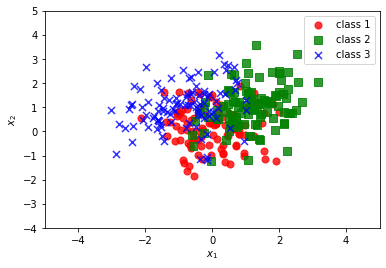

In [1]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
N = 100
rv1 = sp.stats.multivariate_normal([ 0, 0], [[0.7, 0.0], [0.0, 0.7]])
rv2 = sp.stats.multivariate_normal([ 1, 1], [[0.8, 0.2], [0.2, 0.8]])
rv3 = sp.stats.multivariate_normal([-1, 1], [[0.8, 0.2], [0.2, 0.8]])
np.random.seed(0)
X1 = rv1.rvs(N)
X2 = rv2.rvs(N)
X3 = rv3.rvs(N)
y1 = np.zeros(N)
y2 = np.ones(N)
y3 = 2 * np.ones(N)
X = np.vstack([X1, X2, X3])
y = np.hstack([y1, y2, y3])

plt.scatter(X1[:, 0], X1[:, 1], alpha=0.8, s=50, marker="o", color='r', label="class 1")
plt.scatter(X2[:, 0], X2[:, 1], alpha=0.8, s=50, marker="s", color='g', label="class 2")
plt.scatter(X3[:, 0], X3[:, 1], alpha=0.8, s=50, marker="x", color='b', label="class 3")
plt.xlim(-5, 5)
plt.ylim(-4, 5)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.show()

In [2]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(store_covariance=True).fit(X, y)

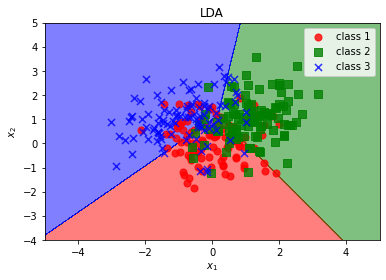

In [3]:
import matplotlib as mpl
import seaborn as sns
x1min, x1max = -5, 5
x2min, x2max = -4, 5
XX1, XX2 = np.meshgrid(np.arange(x1min, x1max, (x1max-x1min)/1000),
                       np.arange(x2min, x2max, (x2max-x2min)/1000))
YY = np.reshape(lda.predict(np.array([XX1.ravel(), XX2.ravel()]).T), XX1.shape)
cmap = mpl.colors.ListedColormap(sns.color_palette(["r", "g", "b"]).as_hex())
plt.contourf(XX1, XX2, YY, cmap=cmap, alpha=0.5)
plt.scatter(X1[:, 0], X1[:, 1], alpha=0.8, s=50, marker="o", color='r', label="class 1")
plt.scatter(X2[:, 0], X2[:, 1], alpha=0.8, s=50, marker="s", color='g', label="class 2")
plt.scatter(X3[:, 0], X3[:, 1], alpha=0.8, s=50, marker="x", color='b', label="class 3")
plt.xlim(x1min, x1max)
plt.ylim(x2min, x2max)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.title("LDA")
plt.show()

---
# 이차판별분석(QDA)
LDA의 결정 경계는 선형으로 가정하고 있기 때문에 Y의 범주 별로 서로 다른 공분산 구조에서의 분류에 어려움이 있다.

이차 판별 분석은 Y의 범주가 서로 다른 공분산 구조를 가진 경우에서 활용이 가능하다. 

장단점 
장점

- 비선형 분류가 가능하다.

단점

- 설명 변수의 개수가 많을 경우, 추정해야 하는 모수가 많아짐 → 연산량이 큼 

In [4]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis(store_covariance=True).fit(X, y)

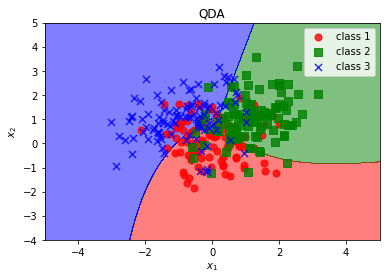

In [5]:
x1min, x1max = -5, 5
x2min, x2max = -4, 5
XX1, XX2 = np.meshgrid(np.arange(x1min, x1max, (x1max-x1min)/1000),
                       np.arange(x2min, x2max, (x2max-x2min)/1000))
YY = np.reshape(qda.predict(np.array([XX1.ravel(), XX2.ravel()]).T), XX1.shape)
cmap = mpl.colors.ListedColormap(sns.color_palette(["r", "g", "b"]).as_hex())
plt.contourf(XX1, XX2, YY, cmap=cmap, alpha=0.5)
plt.scatter(X1[:, 0], X1[:, 1], alpha=0.8, s=50, marker="o", color='r', label="class 1")
plt.scatter(X2[:, 0], X2[:, 1], alpha=0.8, s=50, marker="s", color='g', label="class 2")
plt.scatter(X3[:, 0], X3[:, 1], alpha=0.8, s=50, marker="x", color='b', label="class 3")
plt.xlim(x1min, x1max)
plt.ylim(x2min, x2max)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("QDA")
plt.legend()
plt.show()

# package import

In [6]:
import pandas as pd
import numpy as np

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

In [9]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# data import

In [10]:
url = 'https://raw.githubusercontent.com/RAhyunki/dataset/main/Default.csv' # github에 있는 raw파일 로드
Default = pd.read_csv(url) # credit dataframe에 저장
print(Default.shape)
print(Default.head())

(10000, 4)
  default student      balance        income
0      No      No   729.526495  44361.625074
1      No     Yes   817.180407  12106.134700
2      No      No  1073.549164  31767.138947
3      No      No   529.250605  35704.493935
4      No      No   785.655883  38463.495879


In [11]:
#Series객체1.where(Series객체에 대한 조건문, 거짓 값에 대한 대체 값)
#np.where(배열에 대한 조건문, 참일때 값, 거짓일때 값)의 형태로 사용하며 배열(array)로 반환한다.

Default['default'] = pd.Series(np.where(Default.default.values == 'Yes', 1, 0), Default.index)
Default['student'] = pd.Series(np.where(Default.student.values == 'Yes', 1, 0), Default.index)
Default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  int32  
 1   student  10000 non-null  int32  
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), int32(2)
memory usage: 234.5 KB


In [12]:
Default.head()

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


In [13]:
X = np.array(Default.iloc[:, 1:3])
y = np.array(Default.iloc[:, 0:1])

# LDA / QDA / MultinomialNB(다항정규분포-베이즈분류)

# LDA

In [14]:
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

C:\Users\ahdal\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LinearDiscriminantAnalysis()

In [16]:
y_predict = lda.fit(X, y).predict(X)

C:\Users\ahdal\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [17]:
metrics.accuracy_score(y, y_predict)

0.9725

In [18]:
## Confusion matrix
confusion_matrix(y,lda.predict(X))

array([[9644,   23],
       [ 252,   81]], dtype=int64)

In [19]:
cunfmat = pd.DataFrame(confusion_matrix(y, y_predict),
                        index=['True[No]','True[Yes]',],
                        columns=['Predict[NO]', 'Predict[Yes]']) # 순서가 중요
cunfmat

,Predict[NO],Predict[Yes]
True[No],9644,23
True[Yes],252,81


In [20]:
#from sklearn.metrics import classification_report
print(classification_report(y, y_predict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      9667
           1       0.78      0.24      0.37       333

    accuracy                           0.97     10000
   macro avg       0.88      0.62      0.68     10000
weighted avg       0.97      0.97      0.97     10000



# QDA

In [21]:
#from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda=QuadraticDiscriminantAnalysis()
qda.fit(X, y)

C:\Users\ahdal\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


QuadraticDiscriminantAnalysis()

In [22]:
y_predict = qda.fit(X, y).predict(X)

C:\Users\ahdal\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [23]:
## Confusion matrix
confusion_matrix(y,qda.predict(X))

array([[9637,   30],
       [ 244,   89]], dtype=int64)

In [24]:
cunfmat = pd.DataFrame(confusion_matrix(y, y_predict),
                        index=['True[No]','True[Yes]',],
                        columns=['Predict[NO]', 'Predict[Yes]']) # 순서가 중요
cunfmat

,Predict[NO],Predict[Yes]
True[No],9637,30
True[Yes],244,89


In [25]:
#from sklearn.metrics import classification_report

print(classification_report(y, y_predict))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9667
           1       0.75      0.27      0.39       333

    accuracy                           0.97     10000
   macro avg       0.86      0.63      0.69     10000
weighted avg       0.97      0.97      0.97     10000



# NB

In [26]:
#from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB(alpha=1, fit_prior=True)

In [27]:
nb.fit(X,y)

C:\Users\ahdal\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MultinomialNB(alpha=1)

In [28]:
y_predict = nb.predict(X)

In [29]:
## Confusion matrix
sum(nb.predict(X)==y)/len(y) ## 0.8222222222222222
confusion_matrix(y, nb.predict(X))

array([[9667,    0],
       [ 333,    0]], dtype=int64)

In [30]:
cunfmat = pd.DataFrame(confusion_matrix(y, y_predict),
                        index=['True[No]','True[Yes]',],
                        columns=['Predict[NO]', 'Predict[Yes]']) # 순서가 중요
cunfmat

,Predict[NO],Predict[Yes]
True[No],9667,0
True[Yes],333,0


# 시각화

In [31]:
#from sklearn.datasets import make_classification

In [32]:
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model = LinearDiscriminantAnalysis().fit(X, y)
y_hat = model.predict(X)
f_value = model.decision_function(X)

C:\Users\ahdal\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [33]:
confusion_matrix(y, y_hat, labels=[1, 0])

array([[  81,  252],
       [  23, 9644]], dtype=int64)

In [34]:
recall = 81 / (81 + 252)
fallout = 1- 23 / (23 + 9644)
print("recall =", recall)
print("fallout =", fallout)

recall = 0.24324324324324326
fallout = 0.9976207716975277


In [35]:
#from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, model.decision_function(X))
fpr, tpr, thresholds

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.03444709e-04,
        1.03444709e-04, 2.06889418e-04, 2.06889418e-04, 3.10334126e-04,
        3.10334126e-04, 4.13778835e-04, 4.13778835e-04, 6.20668253e-04,
        6.20668253e-04, 7.24112962e-04, 7.24112962e-04, 8.27557670e-04,
        8.27557670e-04, 9.31002379e-04, 9.31002379e-04, 1.03444709e-03,
        1.03444709e-03, 1.13789180e-03, 1.13789180e-03, 1.24133651e-03,
        1.24133651e-03, 1.55167063e-03, 1.55167063e-03, 1.65511534e-03,
        1.65511534e-03, 1.75856005e-03, 1.75856005e-03, 1.96544947e-03,
        1.96544947e-03, 2.06889418e-03, 2.06889418e-03, 2.17233888e-03,
        2.17233888e-03, 2.27578359e-03, 2.27578359e-03, 2.37922830e-03,
        2.37922830e-03, 2.58611772e-03, 2.58611772e-03, 2.68956243e-03,
        2.68956243e-03, 2.79300714e-03, 2.79300714e-03, 3.10334126e-03,
        3.10334126e-03, 3.41367539e-03, 3.41367539e-03, 3.51712010e-03,
        3.51712010e-03, 3.62056481e-03, 3.62056481e-03, 3.724009

In [36]:
#fpr, tpr, thresholds = roc_curve(y, model.predict_proba(X)[:, 1])
#fpr, tpr, thresholds

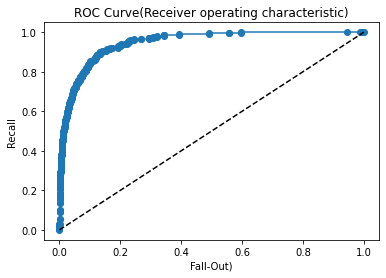

In [37]:
#import matplotlib.pyplot as plt
plt.plot(fpr, tpr, 'o-', label="lda")
plt.plot([0, 1], [0, 1], 'k--')
#plt.plot([fallout], [recall], 'ro', ms=10)
plt.xlabel('Fall-Out)')
plt.ylabel('Recall')
plt.title('ROC Curve(Receiver operating characteristic)')
plt.show()

In [38]:
#from sklearn.datasets import make_classification
model1 = LinearDiscriminantAnalysis().fit(X, y)
y_hat1 = model1.predict(X)

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model2 = QuadraticDiscriminantAnalysis().fit(X, y)
y_hat2 = model2.predict(X)

from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB().fit(X,y)
y_hat3 = model3.predict(X)

from sklearn.naive_bayes import MultinomialNB # 다변량가우스분포
model4 = MultinomialNB().fit(X,y)
y_hat4 = model4.predict(X)

C:\Users\ahdal\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ahdal\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ahdal\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ahdal\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

In [39]:
#from sklearn.naive_bayes import BernoulliNB
#model3 = BernoulliNB(alpha=2).fit(X,y)
#y_hat3 = model3.predict(X)

In [40]:
print(confusion_matrix(y, y_hat1))

[[9644   23]
 [ 252   81]]


In [41]:
print(confusion_matrix(y, y_hat2))

[[9637   30]
 [ 244   89]]


In [42]:
print(confusion_matrix(y, y_hat3))

[[9618   49]
 [ 238   95]]


In [43]:
print(confusion_matrix(y, y_hat4))

[[9667    0]
 [ 333    0]]


In [44]:
print(classification_report(y, model1.predict(X)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      9667
           1       0.78      0.24      0.37       333

    accuracy                           0.97     10000
   macro avg       0.88      0.62      0.68     10000
weighted avg       0.97      0.97      0.97     10000



In [45]:
print(classification_report(y, model2.predict(X)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9667
           1       0.75      0.27      0.39       333

    accuracy                           0.97     10000
   macro avg       0.86      0.63      0.69     10000
weighted avg       0.97      0.97      0.97     10000



In [46]:
print(classification_report(y, model3.predict(X)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      9667
           1       0.66      0.29      0.40       333

    accuracy                           0.97     10000
   macro avg       0.82      0.64      0.69     10000
weighted avg       0.97      0.97      0.97     10000



In [47]:
print(classification_report(y, model4.predict(X)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      9667
           1       0.00      0.00      0.00       333

    accuracy                           0.97     10000
   macro avg       0.48      0.50      0.49     10000
weighted avg       0.93      0.97      0.95     10000



C:\Users\ahdal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


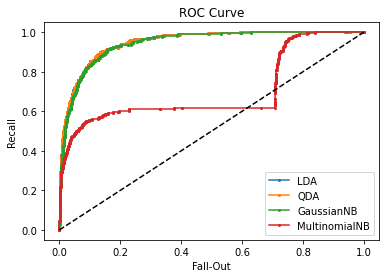

In [48]:
fpr1, tpr1, thresholds1 = roc_curve(y, model1.decision_function(X))
fpr2, tpr2, thresholds1 = roc_curve(y, model2.decision_function(X))
fpr3, tpr3, thresholds1 = roc_curve(y, model3.predict_proba(X)[:, 1]) # NB는 decision_function 메서드를 제공하지 않는 모형임. 따라서 확률 따로 입력해주어야함.
fpr4, tpr4, thresholds1 = roc_curve(y, model4.predict_proba(X)[:, 1]) # NB는 decision_function 메서드를 제공하지 않는 모형임. 따라서 확률 따로 입력해주어야함.

plt.plot(fpr1, tpr1, 'o-', ms=2, label="LDA")
plt.plot(fpr2, tpr2, 'o-', ms=2, label="QDA")
plt.plot(fpr3, tpr3, 'o-', ms=2, label="GaussianNB")
plt.plot(fpr4, tpr4, 'o-', ms=2, label="MultinomialNB")


plt.legend()
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Fall-Out')
plt.ylabel('Recall')
plt.title('ROC Curve')
plt.show()

In [49]:
from sklearn.metrics import auc
auc(fpr1, tpr1), auc(fpr2, tpr2), auc(fpr3, tpr3), auc(fpr4, tpr4)

(0.9495584339900053, 0.9495317185396838, 0.9446511785396651, 0.701788164496347)